In [1]:
#importing our mnist dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [2]:
#Standardizing
X=X/255

In [3]:
#Printing the shape of the both
print("The shape of the X is {} and the shape of y is {}".format(X.shape,y.shape))

The shape of the X is (70000, 784) and the shape of y is (70000,)


In [4]:
#building a zero number classifier here
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [5]:
#Now building the train and test sets
m=X.shape[0]-10000
m_test=X.shape[0]-m
X_train,X_test=X[:m].T,X[m:].T
y_train,y_test=(y[:m].reshape(1,m)),(y[m:].reshape(1,m_test))


In [6]:
#New SHapes are-
print("The Shapes of X_train and X_test are {} {}".format(X_train.shape,X_test.shape))
print("The Shapes of y_train and y_test are {} {}".format(y_train.shape,y_test.shape))

The Shapes of X_train and X_test are (784, 60000) (784, 10000)
The Shapes of y_train and y_test are (1, 60000) (1, 10000)


In [7]:
#Shuffling the datasets here
np.random.seed(138) # consistent examples
shuffle_index = np.random.permutation(m) #The random number
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index] #shuffling

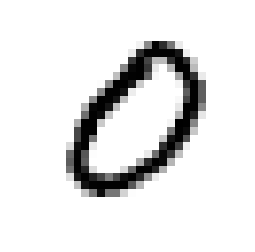

[1.]


In [8]:
#Looking at an example image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

## Logistic Regression

In [9]:
#Here we observe that the input X is of the form 784x70000 which means that 784 we get from 28*28 and it's an greyscaale image
# next 70000 images are there.
#Now implementing the sigmoid function which will be used
def sigmoid(z):
    s= (1/(1+(np.exp(-z))))
    return s

In [10]:
#Now we will define our cost function here
def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    #the cross entropy loss
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) +
                   np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )
    return L

In [11]:
# Now defining our model
learning_rate=1
X=X_train
Y=y_train
n_x=X.shape[0]
m=X.shape[1]
W=np.random.randn(n_x,1)*0.01
b=np.zeros((1,1))
for i in range(2000):
    #The Forward Propagation Step
    Z=np.matmul(W.T,X)+b
    A=sigmoid(Z)
    cost=compute_loss(Y,A)
    #The Backpropagation Step
    dW=(1/m)*np.matmul(X,(A-Y).T)
    db=(1/m)*np.sum(A-Y,axis=1,keepdims=True)
    #Updation Rule
    W=W-learning_rate*dW
    b=b-learning_rate*db
    if (i%100==0):
        print("Epoch is {} and Cost is {}".format(i,cost))
print("The Final Cost is {}".format(cost))

Epoch is 0 and Cost is 0.684080159543643
Epoch is 100 and Cost is 0.041305162058342754
Epoch is 200 and Cost is 0.03578100961598483
Epoch is 300 and Cost is 0.03321767707346867
Epoch is 400 and Cost is 0.031618250521307165
Epoch is 500 and Cost is 0.03047987992166962
Epoch is 600 and Cost is 0.029609158581624707
Epoch is 700 and Cost is 0.028912781392366863
Epoch is 800 and Cost is 0.028338723798575546
Epoch is 900 and Cost is 0.027854953682088075
Epoch is 1000 and Cost is 0.02744030579355481
Epoch is 1100 and Cost is 0.027080051475541836
Epoch is 1200 and Cost is 0.026763531573280784
Epoch is 1300 and Cost is 0.02648279278126125
Epoch is 1400 and Cost is 0.026231753648863553
Epoch is 1500 and Cost is 0.026005669485284065
Epoch is 1600 and Cost is 0.02580077544360537
Epoch is 1700 and Cost is 0.02561404072768779
Epoch is 1800 and Cost is 0.02544299474890846
Epoch is 1900 and Cost is 0.025285601356506867
The Final Cost is 0.025141566084818247


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A >.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[8980   33]
 [  40  947]]


In [13]:
print(classification_report(predictions, labels))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00      9013
       True       0.97      0.96      0.96       987

avg / total       0.99      0.99      0.99     10000



## One Hiddden Layer

In [14]:
learning_rate=1

n_h=64
n_x=X.shape[0]

W1=np.random.randn(n_h,n_x)
W2=np.random.randn(1,n_h)
b1=np.zeros((n_h,1))
b2=np.zeros((1,1))

X=X_train
y=y_train
m=X.shape[1]
for i in range(2000):
    #forward propagation
    Z1=np.matmul(W1,X)+b1
    A1=sigmoid(Z1)
    Z2=np.matmul(W2,A1)+b2
    A2=sigmoid(Z2)

    #Computing The Loss
    cost=compute_loss(Y,A2)
    
    #Now Backpropagation Example
    dZ2=A2-Y
    dW2=(1/m)*np.matmul(dZ2,A2.T)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
    #-----
    dZ1=np.matmul(W2.T,dZ2)*sigmoid(Z1)*(1-sigmoid(Z1))
    dW1=(1/m)*np.matmul(dZ1,X.T)
    db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    #Updation Rule
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    #Printing Epochs
    if (i%100 == 0):
        print("Epoch is {} and Cost is {}".format(i,cost))
print("The Final Cost is {}".format(cost))

Epoch is 0 and Cost is 0.9144384083567224
Epoch is 100 and Cost is 0.11617827938780523
Epoch is 200 and Cost is 0.08497301210857518
Epoch is 300 and Cost is 0.07235373202856842
Epoch is 400 and Cost is 0.06483700276428704
Epoch is 500 and Cost is 0.05958019324382801
Epoch is 600 and Cost is 0.05554178302597507
Epoch is 700 and Cost is 0.05223959677460944
Epoch is 800 and Cost is 0.049474452643074
Epoch is 900 and Cost is 0.047125882776230664
Epoch is 1000 and Cost is 0.04509970632851582
Epoch is 1100 and Cost is 0.04334187296072376
Epoch is 1200 and Cost is 0.04181093092065309
Epoch is 1300 and Cost is 0.04046592785655237
Epoch is 1400 and Cost is 0.03926893165824677
Epoch is 1500 and Cost is 0.03819026583616659
Epoch is 1600 and Cost is 0.03720929593349891
Epoch is 1700 and Cost is 0.03631185660439528
Epoch is 1800 and Cost is 0.03548729462063055
Epoch is 1900 and Cost is 0.03472673547376728
The Final Cost is 0.03402927957320837


In [15]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = (A2>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[8974   54]
 [  46  926]]
             precision    recall  f1-score   support

      False       0.99      0.99      0.99      9028
       True       0.94      0.95      0.95       972

avg / total       0.99      0.99      0.99     10000



## Softmax

In [78]:
#loading and standardinz
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

X = X / 255

In [79]:
#one hot encoding the labels
digits=10
examples=y.shape[0]
y=y.reshape(1,examples)
Y_new = np.eye(digits)[y.astype('int32')]
print("the shape before {}".format(Y_new.shape))
Y_new=Y_new.T.reshape(digits,examples)
print("the shape after {}".format(Y_new.shape))

the shape before (1, 70000, 10)
the shape after (10, 70000)


In [80]:
#reshuffling and splitting
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [81]:
print("The Shapes of X_train and X_test are {} {}".format(X_train.shape,X_test.shape))
print("The Shapes of y_train and y_test are {} {}".format(y_train.shape,y_test.shape))

The Shapes of X_train and X_test are (784, 60000) (784, 10000)
The Shapes of y_train and y_test are (1, 60000) (1, 10000)


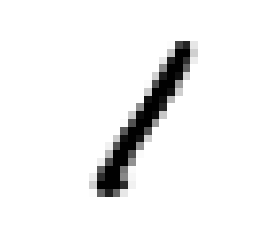

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
#displaying an random image
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [83]:
#multiclass loss is
def compute_multiclass_loss(Y,Y_hat):
    L_sum=np.sum(np.multiply(Y,np.log(Y_hat)))
    m=Y.shape[1]
    L=-(1/m)*L_sum
    return L

In [84]:
#Building our model
n_x=X_train.shape[0]
n_h=64
learning_rate=1

W1=np.random.randn(n_h,n_x)*0.01
W2=np.random.randn(digits,n_h)*0.01
b1=np.zeros((n_h,1))
b2=np.zeros((digits,1))

X=X_train
Y=Y_train

#---Forward Propagation----#

for i in range(2000):
    Z1=np.matmul(W1,X)+b1
    A1=sigmoid(Z1)
    Z2=np.matmul(W2,A1)+b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0) #SOFTMAX FUNC
    
#---The Loss----#    
    
    cost=compute_multiclass_loss(Y,A2)

#---Backward Propagation----#
    
    dZ2=A2-Y
    dW2=(1/m)*np.matmul(dZ2,A1.T)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
    
    dZ1=np.matmul(W2.T,dZ2)* sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1=(1/m)*np.matmul(dZ1,X.T)
    db1=(1/m)*np.sum(dZ1)

#---Updation Rule----#

    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    W2=W2-learning_rate*dW2
    b2=b2-learning_rate*db2
    
    if (i%100 == 0):
        print("For Epoch {} the loss is {}".format(i,cost))
print("The final cost is {}".format(cost))

For Epoch 0 the loss is 2.303426641981376
For Epoch 100 the loss is 0.5282148573724671
For Epoch 200 the loss is 0.3521313707999565
For Epoch 300 the loss is 0.3002757054503863
For Epoch 400 the loss is 0.27042133118105294
For Epoch 500 the loss is 0.24824994537017017
For Epoch 600 the loss is 0.23022704494553597
For Epoch 700 the loss is 0.21506717979750667
For Epoch 800 the loss is 0.20204021803040603
For Epoch 900 the loss is 0.19066879979380966
For Epoch 1000 the loss is 0.180630994544226
For Epoch 1100 the loss is 0.17169318482968537
For Epoch 1200 the loss is 0.16367440466113203
For Epoch 1300 the loss is 0.15643008554571602
For Epoch 1400 the loss is 0.14984326094995878
For Epoch 1500 the loss is 0.14381873828971148
For Epoch 1600 the loss is 0.13827881328114466
For Epoch 1700 the loss is 0.1331599793140135
For Epoch 1800 the loss is 0.12841028231112092
For Epoch 1900 the loss is 0.12398706770865955
The final cost is 0.1198950255596623


In [85]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 966    0    6    2    1    7    7    1    5    8]
 [   0 1117    1    1    0    1    3    8    3    7]
 [   1    2  994    5    5    1    0   16    3    1]
 [   2    2    6  977    1   18    1    5   13   10]
 [   0    0    6    0  938    2    5    3    4   22]
 [   4    1    1    5    0  839    8    1    5    5]
 [   4    5    6    1    5   11  929    0    6    0]
 [   2    2    5    9    3    2    0  981    5    9]
 [   1    6    5    7    3    6    5    0  927    4]
 [   0    0    2    3   26    5    0   13    3  943]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.97      1003
          1       0.98      0.98      0.98      1141
          2       0.96      0.97      0.97      1028
          3       0.97      0.94      0.96      1035
          4       0.96      0.96      0.96       980
          5       0.94      0.97      0.95       869
          6       0.97      0.96      0.97       967
          7       0.95      0.96      0.96  

## Adam Optimization, Xavier Initialization & Mini Batch

In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# import
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

#Scaling our data
X=X/255

# one-hot encode labels
digits = 10
examples = y.shape[0]
y = y.reshape(1, examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

# split, reshape, shuffle
m = 60000
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [2]:
#key functions used in our model
#sigmoid func
def sigmoid(z):
    exp=(1/(1+(np.exp(-z))))
    return exp

#the second step which is to forward propagation step
def feed_forward(X,params):
    cache={}
    cache["Z1"]=np.matmul(params["W1"],X)+params["b1"]
    cache["A1"]=np.tanh(cache["Z1"])
    cache["Z2"]=np.matmul(params["W2"],cache["A1"])+params["b2"]
    cache["A2"]=(np.exp(cache["Z2"]))/(np.sum(np.exp(cache["Z2"]),axis=0))
    return cache
    
#The third step  which is to compute loss
def compute_loss(Y,Y_hat):
    L_sum=np.sum(np.multiply(Y,np.log(Y_hat)))
    m=Y.shape[1]
    L=-(1/m)*L_sum
    return L

#The fourth step which is to propagate backward
def back_propagate(X,Y,params,cache):
    dZ2=cache["A2"]-Y
    dW2=(1/m_batch)*np.matmul(dZ2,cache["A1"].T)
    db2=(1/m_batch)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.matmul(params["W2"].T,dZ2)*(1-np.power(cache["A1"], 2)) #sigmoid(cache["Z1"])*(1-sigmoid(cache["Z1"]))
    dW1=(1/m_batch)*np.matmul(dZ1,X.T)
    db1=(1/m_batch)*np.sum(dZ1,axis=1,keepdims=True)
    grads={"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}
    return grads

In [14]:
#building and training our model
np.random.seed(138)

#setting the hyperparameters here
learning_rate=0.01
beta1=0.9
beta2=0.999
epsilon=1e-8
n_x=X_train.shape[0]
n_h=64
batch_size=256
batches = -(-m // batch_size)


#Now initializing all the params
params={"W1":np.random.randn(n_h,n_x)*np.sqrt(1/(n_x)),
        "W2":np.random.randn(digits,n_h)*np.sqrt(1/(n_h)),
        "b1":np.zeros((n_h,1))*np.sqrt(1/(n_x)),
        "b2":np.zeros((digits,1))*np.sqrt(1/(n_h))
       }

V_dW1 = np.zeros(params["W1"].shape)
V_db1 = np.zeros(params["b1"].shape)
V_dW2 = np.zeros(params["W2"].shape)
V_db2 = np.zeros(params["b2"].shape)
#For Adam Optimization
S_dW1 = np.zeros(params["W1"].shape)
S_db1 = np.zeros(params["b1"].shape)
S_dW2 = np.zeros(params["W2"].shape)
S_db2 = np.zeros(params["b2"].shape)

# Prinitng the total number of batches we got
print("The total number of mini batches which we got are {}".format(batches))

#Training Our Model Here
for i in range(1,101): #Our epochs
    import time
    start = time.time()
    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]
    for j in range(1,batches):
        #Traversing Through Mini Batches
        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin
        #1 pass through gd ~ no cost here
        cache=feed_forward(X,params)
        grads=back_propagate(X,Y,params,cache)
        #momentum
        V_dW1=(beta1*V_dW1+(1-beta1)*grads["dW1"])
        V_db1=(beta1*V_db1+(1-beta1)*grads["db1"])
        V_dW2=(beta1*V_dW2+(1-beta1)*grads["dW2"])
        V_db2=(beta1*V_db2+(1-beta1)*grads["db2"])
        #For AdaM OPTIMIZATION
        S_dW1=(beta2*S_dW1+(1-beta2)*(grads["dW1"]*grads["dW1"]))
        S_db1=(beta2*S_db1+(1-beta2)*(grads["db1"]*grads["db1"]))
        S_dW2=(beta2*S_dW2+(1-beta2)*(grads["dW2"]*grads["dW2"]))
        S_db2=(beta2*S_db2+(1-beta2)*(grads["db2"]*grads["db2"]))
        #All the corrected terms
        V_dW1_Corr=(V_dW1)/(1-(beta1**j))
        V_dW2_Corr=(V_dW2)/(1-(beta1**j))
        V_db1_Corr=(V_db1)/(1-(beta1**j))
        V_db2_Corr=(V_db2)/(1-(beta1**j))
        #RMSProp
        S_dW1_Corr=(S_dW1)/(1-(beta2**j))
        S_dW2_Corr=(S_dW2)/(1-(beta2**j))
        S_db1_Corr=(S_db1)/(1-(beta2**j))
        S_db2_Corr=(S_db2)/(1-(beta2**j))
        #updation rule
        params["W1"]=params["W1"]-learning_rate*(V_dW1_Corr/np.sqrt(S_dW1_Corr + epsilon))
        params["b1"]=params["b1"]-learning_rate*(V_db1_Corr/np.sqrt(S_db1_Corr + epsilon))
        params["W2"]=params["W2"]-learning_rate*(V_dW2_Corr/np.sqrt(S_dW2_Corr + epsilon))
        params["b2"]=params["b2"]-learning_rate*(V_db2_Corr/np.sqrt(S_db2_Corr + epsilon))
    
    #Training Here
    cache = feed_forward(X_train, params)
    train_cost=compute_loss(Y_train, cache["A2"])
    #testing here
    cache = feed_forward(X_test, params)
    test_cost = compute_loss(Y_test, cache["A2"])
    if(i % 10 == 0):
        end = time.time()
        elapsed = end - start
        print("Epoch {}: training cost = {}, test cost = {} and the time it took is {}".format(i ,train_cost, test_cost,elapsed))

print("------------------------------------------Done------------------------------------------------------------------")

The total number of mini batches which we got are 235
Epoch 10: training cost = 0.029217542212520493, test cost = 0.09736250610975704 and the time it took is 2.5039970874786377
Epoch 20: training cost = 0.017776507624177717, test cost = 0.12080741972351196 and the time it took is 2.758000373840332
Epoch 30: training cost = 0.0015995171871713639, test cost = 0.1231315080923304 and the time it took is 2.50799822807312
Epoch 40: training cost = 0.0010291417324252154, test cost = 0.12583635807741242 and the time it took is 1.9799995422363281
Epoch 50: training cost = 0.0004336551596294795, test cost = 0.13682282665580592 and the time it took is 2.0130040645599365
Epoch 60: training cost = 0.0023401754729948866, test cost = 0.1492089466249209 and the time it took is 1.8659989833831787
Epoch 70: training cost = 0.00035552383260366804, test cost = 0.14616949824047581 and the time it took is 2.085000514984131
Epoch 80: training cost = 0.0001618609175651977, test cost = 0.15530065948438435 and 

In [15]:
cache = feed_forward(X_test, params)
predictions = np.argmax(cache["A2"], axis=0)
labels = np.argmax(Y_test, axis=0)

print(classification_report(predictions, labels))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       987
          1       0.99      0.99      0.99      1142
          2       0.98      0.97      0.97      1042
          3       0.97      0.97      0.97      1012
          4       0.97      0.97      0.97       980
          5       0.96      0.96      0.96       891
          6       0.98      0.98      0.98       958
          7       0.96      0.97      0.97      1023
          8       0.96      0.97      0.97       961
          9       0.96      0.96      0.96      1004

avg / total       0.97      0.97      0.97     10000

